<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/practice__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Exam for Deep Network Development course. First part (mandatory)**

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 16/01/2024 10AM-11AM

## Task Description

#### Your task is to implement a custom architecture inspired by **LSTM**, and the **forward function**. The model receives an **image** as input and generates a **caption** of the image.

#### Afterwards, make sure to run cell **3. Testing your implementation** to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

## Basic Imports

All packages necessarry are already imported for you.

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import requests
import math
import matplotlib.pyplot as plt
from torch import nn
from torchvision import models

from torchvision import transforms
import io
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 1. Architecture Description and Visualization

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model You will not find it on the internet.

 **CORRECTION: !!!! C = C*V !!!!!!**

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/1JQcofDuOAMkARUE4JRm43kBtu-AINun9/view?usp=drive_link

<br>
<br>

![](https://drive.google.com/uc?id=1JQcofDuOAMkARUE4JRm43kBtu-AINun9)


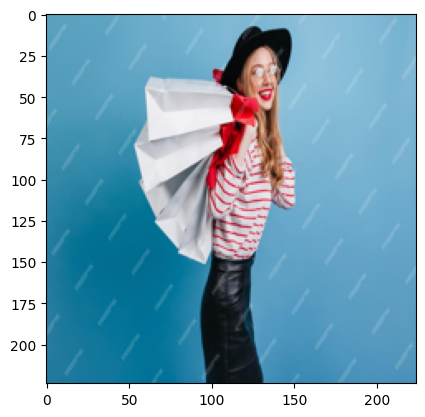

In [ ]:
response = requests.get("https://img.freepik.com/free-photo/merry-girl-leather-skirt-holding-shopping-bags-studio-shot-appealing-blonde-woman-hat-isolated-blue-background_197531-27310.jpg?w=1380&t=st=1705141783~exp=1705142383~hmac=0476c52ec144d19e7e6c11a22c00bd48300607f9b4b9b154ca7c6d7f6184a3b1")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((224, 224))
plt.imshow(image)

In [ ]:
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

input_image = load_image(BytesIO(response.content))
print(input_image.size())

torch.Size([1, 3, 224, 224])


### Create vocabulary

In [ ]:
vocabulary = ['a','girl','shopping','bag','woman','happy','white','glasses','red','with']

# Create a mapping from word to index
word_to_idx = {i: word for i, word in enumerate(vocabulary)}
print(word_to_idx)

{0: 'a', 1: 'girl', 2: 'shopping', 3: 'bag', 4: 'woman', 5: 'happy', 6: 'white', 7: 'glasses', 8: 'red', 9: 'with'}


### 2. Implementing the architecture.

**MODIFY THIS CELL ONLY**

In [ ]:
Q = torch.tensor([[ 0.1,  0.2,  0.3],
                  [ 0.4,  0.5,  0.6],
                  [ 0.7,  0.8,  0.9]])

K = torch.tensor([[ 0.2,  0.3,  0.4],
                  [ 0.5,  0.6,  0.7],
                  [ 0.8,  0.9,  1.0]])

#use random values
V = torch.tensor([[ 0.9,  0.4,  0.3],
                  [ 0.5,  0.2,  0.9],
                  [ 0.1,  0.7,  0.8]])


In [ ]:
import math

In [ ]:
class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=4, padding=1)
        self.conv2 = nn.Conv2d(3, 64, kernel_size=3, stride=10, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=4, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=8, padding=1) #change stride
        self.batchnorm=nn.BatchNorm2d(64)
        self.relu=nn.ReLU()






    def forward(self, x):
        # Apply convolutions
        x1 = self.conv1(x)
        print(f"shape after conv1: {x1.shape}")
        x1=self.batchnorm(x1)
        x1=self.relu(x1)
        print(f"shape after batchnorm1: {x1.shape}")
        print(f"shape after relu1: {x1.shape}")
        x1=self.conv3(x1)
        print(f"shape after conv3: {x1.shape}")


        #Reshape x1 to (1,128,3,3)
        z=x1[:, :, :3, :3]
        print(f"shape after reshape: {z.shape}")

        x2=self.conv2(x)
        print(f"shape after conv2: {x2.shape}")
        x2=self.conv4(x2)
        print(f"shape after conv4: {x2.shape}")

        #Attention
        q=z*Q
        print(f"shape after q: {q.shape}")
        k=z*K
        print(f"shape after k: {k.shape}")
        v=z*V
        print(f"shape after v: {v.shape}")
        c=q*k
        print(f"shape after c: {c.shape}")
        c=c/math.sqrt(100)
        softmax=nn.Softmax(dim=1)
        c=softmax(c)
        print(f"shape after softmax: {c.shape}")
        c=c*v
        print(f"shape after c*v: {c.shape}")



        out=torch.concat((c,x2), dim=1)
        print(f"shape after concat: {out.shape}")





        return out

In [ ]:
image_encoder = ImageEncoder()
encoder=image_encoder(input_image)

shape after conv1: torch.Size([1, 64, 56, 56])
shape after batchnorm1: torch.Size([1, 64, 56, 56])
shape after relu1: torch.Size([1, 64, 56, 56])
shape after conv3: torch.Size([1, 128, 14, 14])
shape after reshape: torch.Size([1, 128, 3, 3])
shape after conv2: torch.Size([1, 64, 23, 23])
shape after conv4: torch.Size([1, 128, 3, 3])
shape after q: torch.Size([1, 128, 3, 3])
shape after k: torch.Size([1, 128, 3, 3])
shape after v: torch.Size([1, 128, 3, 3])
shape after c: torch.Size([1, 128, 3, 3])
shape after softmax: torch.Size([1, 128, 3, 3])
shape after c*v: torch.Size([1, 128, 3, 3])
shape after concat: torch.Size([1, 256, 3, 3])


In [ ]:
import torch
import torch.nn as nn

class TextDecoder(nn.Module):
    def __init__(self):
        super(TextDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=256, hidden_size=512, num_layers=3, dropout=0.2, batch_first=True)
        self.layernorm = nn.LayerNorm(512)
        self.linear = nn.Linear(1310572, 90)  # Fixed input size for Linear layer

    def forward(self, x1):
        # Input Shape
        print(f"Shape before LSTM: {x1.shape}")
        batch_size, channels, height, width = x1.shape

        # Reshape for LSTM: (batch_size, seq_len, input_size)
        seq_len = height * width
        x = x1.permute(0, 2, 3, 1).view(batch_size, seq_len, channels)  # Correct reshaping
        print(f"Shape after view for LSTM: {x.shape}")

        # LSTM forward pass
        x, _ = self.lstm(x)  # Output shape: (batch_size, seq_len, hidden_size)
        print(f"Shape after LSTM: {x.shape}")

        # Apply LayerNorm
        x = self.layernorm(x)
        print(f"Shape after LayerNorm: {x.shape}")

        # Flatten the LSTM output
        x = x.reshape(batch_size, -1)  # Flatten to (batch_size, seq_len * hidden_size)
        print(f"Shape after flattening: {x.shape}")


        current_size = x.shape[1]
        print(f"Current size: {current_size}")
        if current_size < 1310572:
            # Pad if necessary
            padding = 1310572 - current_size
            x = nn.functional.pad(x, (0, padding))
        elif current_size > 1310572:
            # Slice if necessary
            x = x[:, :1310572]
        print(f"Shape after adjustment to 1310572: {x.shape}")

        # Pass through Linear layer
        out = self.linear(x)
        print(f"Shape after Linear: {out.shape}")
        return out






text_decoder=TextDecoder()
decoder=text_decoder(encoder)

Shape before LSTM: torch.Size([1, 256, 3, 3])
Shape after view for LSTM: torch.Size([1, 9, 256])
Shape after LSTM: torch.Size([1, 9, 512])
Shape after LayerNorm: torch.Size([1, 9, 512])
Shape after flattening: torch.Size([1, 4608])
Current size: 4608
Shape after adjustment to 1310572: torch.Size([1, 1310572])
Shape after Linear: torch.Size([1, 90])


In [ ]:
import torch
import torch.nn as nn

class ImageToTextModel(nn.Module):
    def __init__(self, image_encoder, text_decoder):
        super(ImageToTextModel, self).__init__()
        self.softmax = nn.Softmax(dim=1)
        self.image_encoder = image_encoder
        self.text_decoder = text_decoder

    def forward(self, x):
        # Pass the input through the image encoder
        x = self.image_encoder(x)
        print(f"Shape after image encoder: {x.shape}")

        # Pass the output of the encoder to the text decoder
        out = self.text_decoder(x)
        print(f"Shape after text decoder: {out.shape}")

        # Apply softmax to the output
        out = self.softmax(out)
        print(f"Shape after softmax: {out.shape}")

        # Reshape the final output to [1, 9, 10]
        out = torch.reshape(out,(1, 9, 10))
        print(f"Shape after final reshape: {out.shape}")

        return out


In [ ]:

image_to_text_model = ImageToTextModel(image_encoder, text_decoder)
output=image_to_text_model(input_image)

shape after conv1: torch.Size([1, 64, 56, 56])
shape after batchnorm1: torch.Size([1, 64, 56, 56])
shape after relu1: torch.Size([1, 64, 56, 56])
shape after conv3: torch.Size([1, 128, 14, 14])
shape after reshape: torch.Size([1, 128, 3, 3])
shape after conv2: torch.Size([1, 64, 23, 23])
shape after conv4: torch.Size([1, 128, 3, 3])
shape after q: torch.Size([1, 128, 3, 3])
shape after k: torch.Size([1, 128, 3, 3])
shape after v: torch.Size([1, 128, 3, 3])
shape after c: torch.Size([1, 128, 3, 3])
shape after softmax: torch.Size([1, 128, 3, 3])
shape after c*v: torch.Size([1, 128, 3, 3])
shape after concat: torch.Size([1, 256, 3, 3])
Shape after image encoder: torch.Size([1, 256, 3, 3])
Shape before LSTM: torch.Size([1, 256, 3, 3])
Shape after view for LSTM: torch.Size([1, 9, 256])
Shape after LSTM: torch.Size([1, 9, 512])
Shape after LayerNorm: torch.Size([1, 9, 512])
Shape after flattening: torch.Size([1, 4608])
Current size: 4608
Shape after adjustment to 1310572: torch.Size([1, 131

### 3. Testing your implementation

Expected output size:

**torch.Size([ 1, 9, 10])**

In [ ]:
match = np.array(output.size()) == [1,9,10]
if np.all(match):
    print('Size is matched:', output.size())
else:
    raise TypeError("Size is not matched")


Size is matched: torch.Size([1, 9, 10])


### 4. Solution

Visualizing your results. **DO NOT MODIFY THIS CODE**

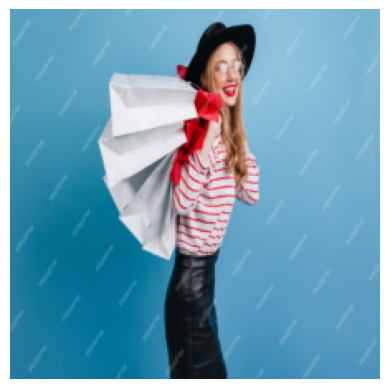

Generated Caption: happy happy girl shopping red girl happy a red


In [ ]:
# Display the image
plt.imshow(np.transpose(input_image.squeeze().numpy(), (1, 2, 0)))
plt.axis("off")
plt.show()

# Get the predicted indices for each word in the vocabulary
predicted_indices = torch.argmax(output, dim = -1)
# Convert indices to words using the vocabulary
predicted_words = [word_to_idx[int(idx)] for idx in predicted_indices[0]]

# Combine words into a caption
caption = ' '.join(predicted_words)

print("Generated Caption:", caption)